In [ ]:

import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, LSTM, Dropout
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [ ]:
data = pd.read_csv("/content/sample_data/Khammam precipitation data 2.csv")
data = data['Rainfall']

FileNotFoundError: ignored

In [ ]:
print(data)

No handles with labels found to put in legend.


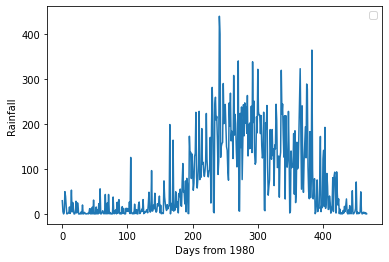

In [ ]:
plt.plot(data)
plt.xlabel("Days from 1980")
plt.ylabel("Rainfall")
plt.legend()
plt.show()

# New Section

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
data.values.shape

(468,)

In [ ]:
train = data.values[:400]
test = data.values[400:]
train_idx = data.index[:400]
test_idx = data.index[400:]

No handles with labels found to put in legend.


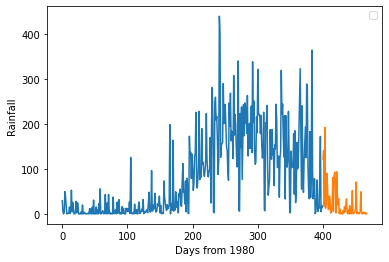

In [ ]:
plt.plot(train_idx, train)
plt.plot(test_idx, test)
plt.xlabel("Days from 1980")
plt.ylabel("Rainfall")
plt.legend()
plt.show()

In [ ]:
np.asarray(data).reshape(-1, 1).shape

(468, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))   # used for rescaling the rainfall data btw 0 and 1
scaled_data = scaler.fit_transform(np.asarray(data).reshape(-1,1))
scaled_data = np.squeeze(np.asarray(scaled_data))
scaled_data.shape

(468,)

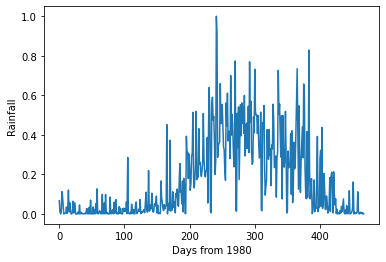

In [ ]:
plt.plot(scaled_data)
plt.xlabel("Days from 1980")
plt.ylabel("Rainfall")
plt.show()

In [ ]:
X_train, y_train = [], []

for i in range(24, len(train)):
    scd = scaled_data[i-24:i].reshape((24, 1))
    X_train.append(scd)
    y_train.append(scaled_data[i])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
model = Sequential()
model.add(LSTM(units=32, return_sequences=True, input_shape=(None, X_train.shape[-1])))
model.add(LSTM(units=16, return_sequences=True))
model.add(LSTM(units=16))
model.add(Dense(units=8))
model.add(Dense(units=1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
12/12 [==============================] - 6s 28ms/step - loss: 0.0725
Epoch 2/50
12/12 [==============================] - 0s 29ms/step - loss: 0.0298
Epoch 3/50
12/12 [==============================] - 0s 27ms/step - loss: 0.0242
Epoch 4/50
12/12 [==============================] - 0s 29ms/step - loss: 0.0229
Epoch 5/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0199
Epoch 6/50
12/12 [==============================] - 0s 28ms/step - loss: 0.0207
Epoch 7/50
12/12 [==============================] - 0s 29ms/step - loss: 0.0205
Epoch 8/50
12/12 [==============================] - 0s 28ms/step - loss: 0.0232
Epoch 9/50
12/12 [==============================] - 0s 29ms/step - loss: 0.0206
Epoch 10/50
12/12 [==============================] - 0s 29ms/step - loss: 0.0183
Epoch 11/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0168
Epoch 12/50
12/12 [==============================] - 0s 30ms/step - loss: 0.0217
Epoch 13/50
12/12 [==================

In [ ]:
X_test = []

inputs = data[len(data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.fit_transform(inputs)

for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
yp = model.predict(X_test)
yp = scaler.inverse_transform(yp)

No handles with labels found to put in legend.


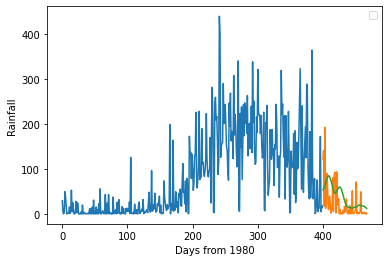

In [ ]:
X_test = data.index[400:]
y_test = data[400:]
X_tr = data.index[:400]
y_tr = data[:400]

plt.plot(X_tr, y_tr)
plt.plot(X_test, y_test)
plt.plot(X_test, yp)
plt.xlabel("Days from 1980")
plt.ylabel("Rainfall")
plt.legend()
plt.show()

In [ ]:
# #testing the prediction
# X_test = [2020,1]
# X_test.values.reshape(-1,1)
# # np.asarray.reshape(X_test)
# print(reg.predict(X_test))


AttributeError: ignored

In [2]:
# echo "# Weather-Prediction" >> README.md
git init
# git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/Prasad-py/Weather-Prediction.git
git push -u origin main

SyntaxError: ignored